## **Environment Impact of Food Production Analysis**

### Business Understanding  
The environmental impact of food production is a critical global issue, affecting climate change, water scarcity, and biodiversity. As food demand rises with population growth and economic development, the challenge is to produce food sustainably while minimizing negative environmental consequences. This project seeks to analyze the environmental footprint of different food products and identify ways to reduce their impact.

### Objective/Goals 
- Assess the environmental impact of food production across various stages (e.g., land use, water usage, carbon emissions).  
- Identify the most and least sustainable food products based on environmental factors.  
- Provide data-driven insights to support policymakers, businesses, and consumers in making informed decisions.  
- Recommend strategies to reduce the environmental footprint of food production.  

### Problem Statement  
Food production contributes significantly to greenhouse gas emissions, water pollution, and deforestation. However, the environmental impact varies across food types and production methods. Without proper analysis, policymakers, businesses, and consumers lack the insights needed to adopt more sustainable food choices. This project aims to quantify and analyze the environmental impact of food production to guide sustainable practices.

### Stakeholders 
- **Government and policymakers** – To develop regulations and policies for sustainable food production.  
- **Agricultural and food industries** – To adopt environmentally friendly farming and production techniques.  
- **Consumers** – To make informed choices about sustainable food consumption.  
- **Environmental organizations** – To advocate for sustainable food systems.  
- **Researchers and data scientists** – To further study the impact of food production on the environment.  

### Features (Key Data Points)  
Here’s a clean, organized **Markdown version** of your documentation, reflecting the updated and regrouped `food_mapping` and other sections clearly:

---

# 📊 Features and Columns

The raw dataset comprises environmental impact data for **43 distinct food products**.  
To facilitate analysis, feature engineering has been employed to categorize these products into **Animal-Based** and **Plant-Based** foods with additional **subcategories**.  
Verbose feature names have also been **standardized** for better readability.

---

## 🍱 Food Product Categories and Subcategories

### **Food Classification Hierarchy**

| Food_Category    | Food_Subcategory       | Food_Product                                                                 |
|------------------|-------------------------|-------------------------------------------------------------------------------|
| **Animal-Based** | **Red Meat**            | Beef (beef herd), Beef (dairy herd), Lamb & Mutton, Pig Meat                 |
|                  | **Poultry**             | Poultry Meat                                                                 |
|                  | **Dairy**               | Milk, Cheese                                                                 |
|                  | **Eggs**                | Eggs                                                                         |
|                  | **Seafood**             | Fish (farmed), Shrimps (farmed)                                              |
| **Plant-Based**  | **Cereal Grains & Staples** | Wheat & Rye (Bread), Maize (Meal), Barley (Beer), Oatmeal, Rice, Potatoes, Cassava |
|                  | **Legumes & Pulses**    | Other Pulses, Peas                                                           |
|                  | **Nuts & Seeds**        | Nuts, Groundnuts                                                             |
|                  | **Soy Products**        | Soymilk, Tofu                                                                |
|                  | **Vegetable Oils**      | Soybean Oil, Palm Oil, Sunflower Oil, Rapeseed Oil, Olive Oil               |
|                  | **Vegetables**          | Onions & Leeks, Root Vegetables, Brassicas, Other Vegetables                |
|                  | **Fruits**              | Tomatoes, Citrus Fruit, Bananas, Apples, Berries & Grapes, Other Fruit      |
|                  | **Beverages & Alcohol** | Wine                                                                         |
|                  | **Stimulants & Confectionery** | Coffee, Dark Chocolate                                                |
|                  | **Sugars**              | Cane Sugar, Beet Sugar                                                       |

> ✅ **Summary**:  
> - **Animal-Based Foods**: 10 distinct products  
> - **Plant-Based Foods**: 33 distinct products

---

## 🌍 Environmental Impact Features

Feature names in the original dataset were verbose. Below is a summary of their **standardized and renamed forms**:

### 🔧 Feature Renaming Table

| Original Feature Name                                     | Renamed Feature     | Description                                           | Units                        |
|-----------------------------------------------------------|----------------------|-------------------------------------------------------|------------------------------|
| Land use change                                           | `Land_use_Change`    | GHG emissions from land use change                   | kg CO₂ eq / kg food          |
| Animal Feed                                               | `Animal_Feed`        | Emissions from producing livestock feed              | kg CO₂ eq / kg food          |
| Farm                                                      | `Farm`               | Emissions from farming activities                    | kg CO₂ eq / kg food          |
| Processing                                                | `Processing`         | Emissions from food processing                       | kg CO₂ eq / kg food          |
| Transport                                                 | `Transport`          | Emissions from transportation                        | kg CO₂ eq / kg food          |
| Packaging                                                 | `Packaging`          | Emissions from packaging                             | kg CO₂ eq / kg food          |
| Retail                                                    | `Retail`             | Emissions from storing & selling                     | kg CO₂ eq / kg food          |
| Total emissions                                           | `Total_emissions`    | Sum of all emission sources                          | kg CO₂ eq / kg food          |
| Eutrophying emissions per 1000kcal                        | `Eutro_1000kcal`     | Eutrophication per 1000 kcal                         | g PO₄ eq / 1000 kcal         |
| Eutrophying emissions per kilogram                        | `Eutro_kg`           | Eutrophication per kg of food                        | g PO₄ eq / kg food           |
| Eutrophying emissions per 100g protein                    | `Eutro_100gP`        | Eutrophication per 100g protein                      | g PO₄ eq / 100g protein      |
| Freshwater withdrawals per 1000kcal                       | `Water_1000kcal`     | Water use per 1000 kcal                              | L / 1000 kcal                |
| Freshwater withdrawals per 100g protein                   | `Water_100gP`        | Water use per 100g protein                           | L / 100g protein             |
| Freshwater withdrawals per kilogram                       | `Water_kg`           | Water use per kg of food                             | L / kg food                  |
| Greenhouse gas emissions per 1000kcal                     | `GHG_1000kcal`       | GHG emissions per 1000 kcal                          | kg CO₂ eq / 1000 kcal        |
| Greenhouse gas emissions per 100g protein                 | `GHG_100gP`          | GHG emissions per 100g protein                       | kg CO₂ eq / 100g protein     |
| Land use per 1000kcal                                     | `Land_1000kcal`      | Land used per 1000 kcal                              | m² / 1000 kcal               |
| Land use per kilogram                                     | `Land_kg`            | Land used per kg of food                             | m² / kg food                 |
| Land use per 100g protein                                 | `Land_100gP`         | Land used per 100g protein                           | m² / 100g protein            |
| Scarcity-weighted water use per kilogram                  | `SW_Water_kg`        | Scarcity-weighted water use per kg                   | L / kg food                  |
| Scarcity-weighted water use per 100g protein              | `SW_Water_100gP`     | Scarcity-weighted water use per 100g protein         | L / 100g protein             |
| Scarcity-weighted water use per 1000kcal                  | `SW_Water_1000kcal`  | Scarcity-weighted water use per 1000 kcal            | L / 1000 kcal                |

---

## 📈 Summary of Key Metrics

### 📌 Metric Categories and Their Features

| **Category**                    | **Features**                                                                 |
|--------------------------------|------------------------------------------------------------------------------|
| **Emissions**                  | Land_use_Change, Animal_Feed, Farm, Processing, Transport, Packaging, Retail, Total_emissions, GHG_1000kcal, GHG_100gP |
| **Eutrophication Impact**      | Eutro_1000kcal, Eutro_kg, Eutro_100gP                                       |
| **Water Use**                  | Water_1000kcal, Water_100gP, Water_kg                                       |
| **Land Use**                   | Land_1000kcal, Land_kg, Land_100gP                                          |
| **Scarcity-Weighted Water Use**| SW_Water_kg, SW_Water_100gP, SW_Water_1000kcal                              |

---

## 🧠 Summary: When to Use Which Metric?

| Metric Type       | Best For                                     | Example Question                                           |
|-------------------|-----------------------------------------------|------------------------------------------------------------|
| **Per kg of food**     | Understanding total impact per kilogram         | “Which food has the highest emissions per kg?”              |
| **Per 1000 kcal**      | Measuring calorie-efficiency of production      | “Which foods provide calories with the lowest environmental impact?” |
| **Per 100g protein**   | Measuring protein-efficiency of production      | “Which foods provide protein with the lowest environmental impact?” |

---






### Hypothesis

Null Hypothesis (H₀):
Animal-based food production does not have a significantly higher environmental footprint than plant-based food production.
(There is no significant difference or plant-based may have equal or greater impact.)

Alternative Hypothesis (H₁):
Animal-based food production has a significantly higher environmental footprint than plant-based food production.



### 7 Analytical Questions  
1. Which food products have the highest and lowest carbon emissions?  
2. Which stage of food production contributes the most to carbon emissions?
3. How do carbon emissions (Greenhouse Gases) differ between animal-based and plant-based foods across all stages of production?
4. What is the relationship between land use (per kcal and per kg) and food category?
5. How do water withdrawals (freshwater and scarcity-weighted) vary between food categories?
6. How does processing impact the total emissions for animal-based foods compared to plant-based foods?
7. What is the environmental trade-off between animal feed and overall emissions in animal-based foods?
8. Which food category has the highest eutrophying emissions per protein (gPO₄eq), and how does it relate to its overall emissions?
9. How do packaging emissions vary between animal-based and plant-based foods, and what impact does this have on overall sustainability?

### Data Understanding & Preparation
Importing all the relevant libraries

In [26]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# To load multiple files
import glob 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Date and time handling
from datetime import datetime

# Geospatial analysis (if needed for visualizing trade routes)
import geopandas as gpd

# Machine learning (if needed for predictive modeling)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For handling large datasets (if needed)
import dask.dataframe as dd

# For interactive visualizations (optional)
import plotly.express as px
import plotly.graph_objects as go

# For data profiling- pandas (optional)
#import ydata_profiling
#from ydata_profiling import ProfileReport


# For handling missing data
from sklearn.impute import SimpleImputer

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For advanced visualizations (optional)
import altair as alt

# For working with Excel files (if your data is in Excel format)
import openpyxl

# For reading data from different file formats
import pyarrow

# For working with large CSV files
import csv

# For system operations
import os
import sys

# For progress bars in data processing
from tqdm import tqdm

# Set plotting style
# plt.style.use('seaborn')

### Load all datasets from their sources

In [27]:
# Path of csv file
file_path = '../EIFPA_Data/Food_Production.csv'
 
# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_Food_Production= pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_Food_Production.head()

File exists at the specified path.


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


### Exploratory Data Analysis(EDA) 

In [28]:
df_Food_Production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [29]:
#Summary Statistics
df_Food_Production.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [30]:
# Get the list of all column names in the DataFrame
columns = df_Food_Production.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_Food_Production[column].unique().size} unique values')  
    print(f'{df_Food_Production[column].unique()}')  
    print('_' * 80)

Food product
There are 43 unique values
['Wheat & Rye (Bread)' 'Maize (Meal)' 'Barley (Beer)' 'Oatmeal' 'Rice'
 'Potatoes' 'Cassava' 'Cane Sugar' 'Beet Sugar' 'Other Pulses' 'Peas'
 'Nuts' 'Groundnuts' 'Soymilk' 'Tofu' 'Soybean Oil' 'Palm Oil'
 'Sunflower Oil' 'Rapeseed Oil' 'Olive Oil' 'Tomatoes' 'Onions & Leeks'
 'Root Vegetables' 'Brassicas' 'Other Vegetables' 'Citrus Fruit' 'Bananas'
 'Apples' 'Berries & Grapes' 'Wine' 'Other Fruit' 'Coffee'
 'Dark Chocolate' 'Beef (beef herd)' 'Beef (dairy herd)' 'Lamb & Mutton'
 'Pig Meat' 'Poultry Meat' 'Milk' 'Cheese' 'Eggs' 'Fish (farmed)'
 'Shrimps (farmed)']
________________________________________________________________________________
Land use change
There are 21 unique values
[ 0.1  0.3  0.   0.6  1.2 -2.1  0.4  0.2  1.   3.1 -0.4 -0.1  3.7 14.3
 16.3  0.9  0.5  1.5  2.5  4.5  0.7]
________________________________________________________________________________
Animal Feed
There are 10 unique values
[0.  1.9 2.5 2.4 2.9 1.8 0.2 2.3 2.2 0

In [31]:
df_Food_Production.duplicated().sum()

np.int64(0)

In [32]:
# Check for duplicated rows
duplicated_rows = df_Food_Production.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_Food_Production[duplicated_rows]

Number of duplicated rows: 0


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)


In [33]:
# Check the datatype and the number of columns for Food_Production 

df_Food_Production.info(verbose=False, memory_usage='deep')
 
missing_counts = df_Food_Production.isna().sum()
non_null_counts = df_Food_Production.notna().sum()
dtype_info = df_Food_Production.dtypes
 
df_Food_Productioninfo = pd.DataFrame({
    "Non-Null Count": non_null_counts,
    "Missing Count": missing_counts,
    "Missing Percentage": round((missing_counts / len(df_Food_Production)) * 100, 2),
    "Dtype": dtype_info
})
 
# Display results
df_Food_Productioninfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Columns: 23 entries, Food product to Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
dtypes: float64(22), object(1)
memory usage: 10.0 KB


,Non-Null Count,Missing Count,Missing Percentage,Dtype
Food product,43,0,0.00,object
Land use change,43,0,0.00,float64
Animal Feed,43,0,0.00,float64
Farm,43,0,0.00,float64
Processing,43,0,0.00,float64
Transport,43,0,0.00,float64
Packging,43,0,0.00,float64
Retail,43,0,0.00,float64
Total_emissions,43,0,0.00,float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),33,10,23.26,float64


In [34]:
# Check the total number of rows
total_rows = df_Food_Production.shape[0]

# Count missing values per row
missing_counts_per_row = df_Food_Production.isna().sum(axis=1)

# Count non-null values per row
non_null_counts_per_row = df_Food_Production.notna().sum(axis=1)

# Compute missing percentage per row
missing_percentage_per_row = round((missing_counts_per_row / df_Food_Production.shape[1]) * 100, 2)

# Create DataFrame summarizing row-wise information
df_Food_Production_row_info = pd.DataFrame({
    "Non-Null Count": non_null_counts_per_row,
    "Missing Count": missing_counts_per_row,
    "Missing Percentage": missing_percentage_per_row
})

# Display the first few rows
df_Food_Production_row_info.head()


,Non-Null Count,Missing Count,Missing Percentage
0,9,14,60.87
1,9,14,60.87
2,9,14,60.87
3,23,0,0.00
4,23,0,0.00


In [35]:
# Define missing percentage threshold categories 
low_missing_threshold = 5  # Use median for <5%
moderate_missing_threshold = 30  # Use mean for 5-30%
high_missing_threshold = 30  # Drop rows above 30% missing values

# Identify missing percentages per row
missing_percentage_per_row = df_Food_Production.isnull().sum(axis=1) / df_Food_Production.shape[1] * 100

# Identify rows to drop
rows_to_drop = missing_percentage_per_row > high_missing_threshold

# Capture the "Food product" names of dropped rows
dropped_products = df_Food_Production.loc[rows_to_drop, "Food product"]

# Print the dropped "Food product" entries
print("Rows dropped due to >30% missing values (based on 'Food product'):")
print(dropped_products.to_list())

# Drop the rows
df_Food_Production = df_Food_Production[~rows_to_drop]

# Fill missing values in the remaining rows based on thresholds
for col in df_Food_Production.columns:
    missing_percentage_col = df_Food_Production[col].isnull().sum() / len(df_Food_Production) * 100

    if missing_percentage_col == 0:
        continue  # No missing values, skip
    
    elif missing_percentage_col <= low_missing_threshold:
        df_Food_Production[col].fillna(df_Food_Production[col].median(), inplace=True)  # Use median
    
    elif missing_percentage_col <= moderate_missing_threshold:
        df_Food_Production[col].fillna(df_Food_Production[col].mean(), inplace=True)  # Use mean

# Display updated missing value status
print(f"\nRemaining Rows: {df_Food_Production.shape[0]}")
print("Missing values per column after cleaning:")
print(df_Food_Production.isnull().sum())


Rows dropped due to >30% missing values (based on 'Food product'):
['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Soymilk', 'Tofu', 'Soybean Oil', 'Other Vegetables', 'Wine', 'Other Fruit', 'Shrimps (farmed)']

Remaining Rows: 33
Missing values per column after cleaning:
Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions pe

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_20356\1660630975.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Food_Production[col].fillna(df_Food_Production[col].mean(), inplace=True)  # Use mean


In [36]:
# Check the datatype and the number of columns for Food_Production 

df_Food_Production.info(verbose=False, memory_usage='deep')
 
missing_counts = df_Food_Production.isna().sum()
non_null_counts = df_Food_Production.notna().sum()
dtype_info = df_Food_Production.dtypes
 
df_Food_Productioninfo = pd.DataFrame({
    "Non-Null Count": non_null_counts,
    "Missing Count": missing_counts,
    "Missing Percentage": round((missing_counts / len(df_Food_Production)) * 100, 2),
    "Dtype": dtype_info
})
 
# Display results
df_Food_Productioninfo

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 3 to 41
Columns: 23 entries, Food product to Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
dtypes: float64(22), object(1)
memory usage: 7.8 KB


,Non-Null Count,Missing Count,Missing Percentage,Dtype
Food product,33,0,0.0,object
Land use change,33,0,0.0,float64
Animal Feed,33,0,0.0,float64
Farm,33,0,0.0,float64
Processing,33,0,0.0,float64
Transport,33,0,0.0,float64
Packging,33,0,0.0,float64
Retail,33,0,0.0,float64
Total_emissions,33,0,0.0,float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),33,0,0.0,float64


Feature Engineering

In [37]:
# Define Food Category and Subcategory mapping
food_mapping = {
    # Animal-Based Foods
    "Beef (beef herd)": ("Animal-Based", "Red Meat"),
    "Beef (dairy herd)": ("Animal-Based", "Red Meat"),
    "Lamb & Mutton": ("Animal-Based", "Red Meat"),
    "Pig Meat": ("Animal-Based", "Red Meat"),
    
    "Poultry Meat": ("Animal-Based", "Poultry"),

    "Milk": ("Animal-Based", "Dairy"),
    "Cheese": ("Animal-Based", "Dairy"),

    "Eggs": ("Animal-Based", "Eggs"),

    "Fish (farmed)": ("Animal-Based", "Seafood"),
    "Shrimps (farmed)": ("Animal-Based", "Seafood"),

    # Plant-Based Foods
    # Cereal Grains & Staples
    "Wheat & Rye (Bread)": ("Plant-Based", "Cereal Grains & Staples"),
    "Maize (Meal)": ("Plant-Based", "Cereal Grains & Staples"),
    "Barley (Beer)": ("Plant-Based", "Cereal Grains & Staples"),
    "Oatmeal": ("Plant-Based", "Cereal Grains & Staples"),
    "Rice": ("Plant-Based", "Cereal Grains & Staples"),
    "Potatoes": ("Plant-Based", "Cereal Grains & Staples"),
    "Cassava": ("Plant-Based", "Cereal Grains & Staples"),

    # Legumes & Pulses
    "Peas": ("Plant-Based", "Legumes & Pulses"),
    "Other Pulses": ("Plant-Based", "Legumes & Pulses"),

    # Nuts & Seeds
    "Nuts": ("Plant-Based", "Nuts & Seeds"),
    "Groundnuts": ("Plant-Based", "Nuts & Seeds"),

    # Soy Products
    "Soymilk": ("Plant-Based", "Soy Products"),
    "Tofu": ("Plant-Based", "Soy Products"),

    # Vegetable Oils
    "Soybean Oil": ("Plant-Based", "Vegetable Oils"),
    "Palm Oil": ("Plant-Based", "Vegetable Oils"),
    "Sunflower Oil": ("Plant-Based", "Vegetable Oils"),
    "Rapeseed Oil": ("Plant-Based", "Vegetable Oils"),
    "Olive Oil": ("Plant-Based", "Vegetable Oils"),

    # Vegetables
    "Onions & Leeks": ("Plant-Based", "Vegetables"),
    "Root Vegetables": ("Plant-Based", "Vegetables"),
    "Brassicas": ("Plant-Based", "Vegetables"),
    "Other Vegetables": ("Plant-Based", "Vegetables"),

    # Fruits
    "Tomatoes": ("Plant-Based", "Fruits"),
    "Citrus Fruit": ("Plant-Based", "Fruits"),
    "Bananas": ("Plant-Based", "Fruits"),
    "Apples": ("Plant-Based", "Fruits"),
    "Berries & Grapes": ("Plant-Based", "Fruits"),
    "Other Fruit": ("Plant-Based", "Fruits"),

    # Beverages & Alcohol
    "Wine": ("Plant-Based", "Beverages & Alcohol"),

    # Stimulants & Confectionery
    "Coffee": ("Plant-Based", "Stimulants & Confectionery"),
    "Dark Chocolate": ("Plant-Based", "Stimulants & Confectionery"),

    # Sugars
    "Cane Sugar": ("Plant-Based", "Sugars"),
    "Beet Sugar": ("Plant-Based", "Sugars"),
}


# Map categories to new columns
df_Food_Production["Food_Category"] = df_Food_Production["Food product"].map(lambda x: food_mapping.get(x, ("Unknown", "Unknown"))[0])
df_Food_Production["Food_Subcategory"] = df_Food_Production["Food product"].map(lambda x: food_mapping.get(x, ("Unknown", "Unknown"))[1])

# Reorder columns to move the new columns right after "Food_Product"
cols = df_Food_Production.columns.tolist()
product_index = cols.index("Food product")
new_order = cols[:product_index+1] + ["Food_Category", "Food_Subcategory"] + cols[product_index+1:-2]
df_Food_Production = df_Food_Production[new_order]

# Display updated DataFrame
df_Food_Production.head()


,Food product,Food_Category,Food_Subcategory,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,Plant-Based,Cereal Grains & Staples,0.0,0.0,1.4,0.0,0.1,0.1,0.0,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,Plant-Based,Cereal Grains & Staples,0.0,0.0,3.6,0.1,0.1,0.1,0.1,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,Plant-Based,Cereal Grains & Staples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,Plant-Based,Cereal Grains & Staples,0.6,0.0,0.2,0.0,0.1,0.0,0.0,...,1437.975324,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,59196.438503,17380.575408
7,Cane Sugar,Plant-Based,Sugars,1.2,0.0,0.5,0.0,0.8,0.1,0.0,...,1437.975324,620.1,0.911681,13.524906,0.581197,2.04,29.105042,16438.6,59196.438503,4683.361823


In [38]:
# Dictionary mapping old column names to new ones
column_renaming = {
    "Food product": "Food_product",
    "Land use change": "Land_use_Change",
    "Animal Feed": "Animal_Feed",
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "Eutro_emissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "Eutro_emissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "Eutro_emissions_100kgP",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshWaterW_1000kcal",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshWaterW_100gP",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshWaterW_100kg",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseG_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseG_100gP",
    "Land use per 1000kcal (m² per 1000kcal)": "Land_1000kcal",
    "Land use per kilogram (m² per kilogram)": "Land_100kg",
    "Land use per 100g protein (m² per 100g protein)": "LandP_100g",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityW_Water_100kgP",
    "Scarcity-weighted water use per kilogram (liters per kilogram)" : "ScarcityW_Water_kg",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityW_Water_1000kcal",
}

# Rename columns in the DataFrame
df_Food_Production.rename(columns=column_renaming, inplace=True)

# Display the updated column names
df_Food_Production.head()


,Food_product,Food_Category,Food_Subcategory,Land_use_Change,Animal_Feed,Farm,Processing,Transport,Packging,Retail,...,FreshWaterW_100gP,FreshWaterW_100kg,GreenhouseG_1000kcal,GreenhouseG_100gP,Land_1000kcal,Land_100kg,LandP_100g,ScarcityW_Water_kg,ScarcityW_Water_100kgP,ScarcityW_Water_1000kcal
3,Oatmeal,Plant-Based,Cereal Grains & Staples,0.0,0.0,1.4,0.0,0.1,0.1,0.0,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,Plant-Based,Cereal Grains & Staples,0.0,0.0,3.6,0.1,0.1,0.1,0.1,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,Plant-Based,Cereal Grains & Staples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,Plant-Based,Cereal Grains & Staples,0.6,0.0,0.2,0.0,0.1,0.0,0.0,...,1437.975324,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,59196.438503,17380.575408
7,Cane Sugar,Plant-Based,Sugars,1.2,0.0,0.5,0.0,0.8,0.1,0.0,...,1437.975324,620.1,0.911681,13.524906,0.581197,2.04,29.105042,16438.6,59196.438503,4683.361823


### observations 

- The dataset contains 43 rows and 23 columns

- It includes total emissions and detailed breakdowns like: 
Food products, Land use , Animal Feed, Farm, Processing, Transport, Packaging, Retail, Water use, GreenHouse Gas emissions, and Eutrophication potential.

- There was no duplicates but however but there were missing count percentages row wise and column wise. From further checks the row wise missing counts percentages were higher than column wise. Rows wise was dropped due to >30% missing values (based on 'Food product'):
['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Soymilk', 'Tofu', 'Soybean Oil', 'Other Vegetables', 'Wine', 'Other Fruit', 'Shrimps (farmed)']. 

- Feature engineering was done 2 new columns Food_ Category and Food_Subcategory was created. The Food_product was grouped properly under the two new columns. Some of the columns headers were renamed for easy reading.

### Type of Analysis: Univariate vs Bivariate vs Multivariate

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_20356\1435702993.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_Food_Production, x="Food_Category", y="Total_emissions", ci=None)


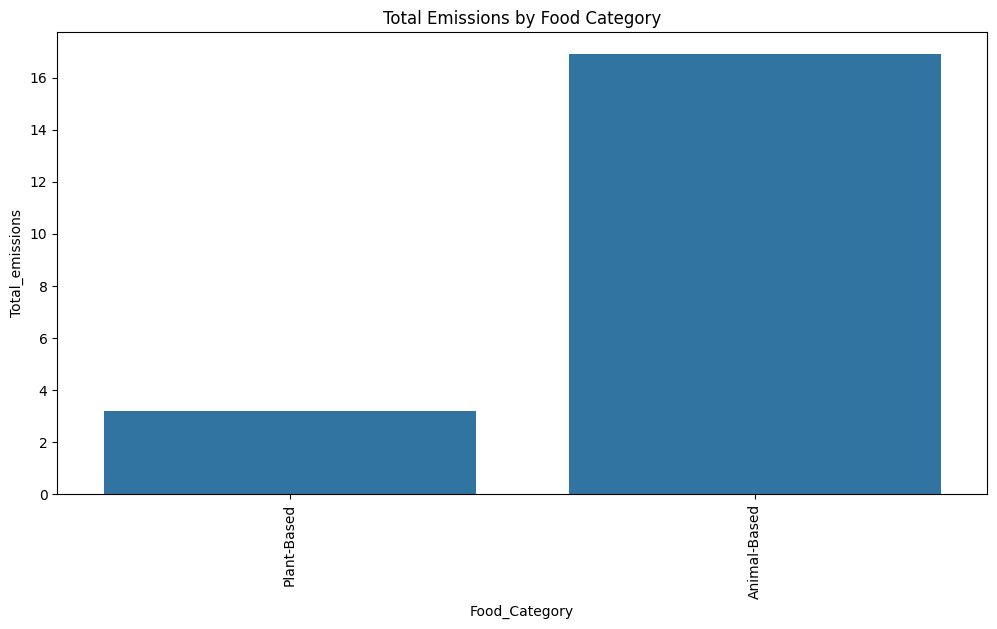

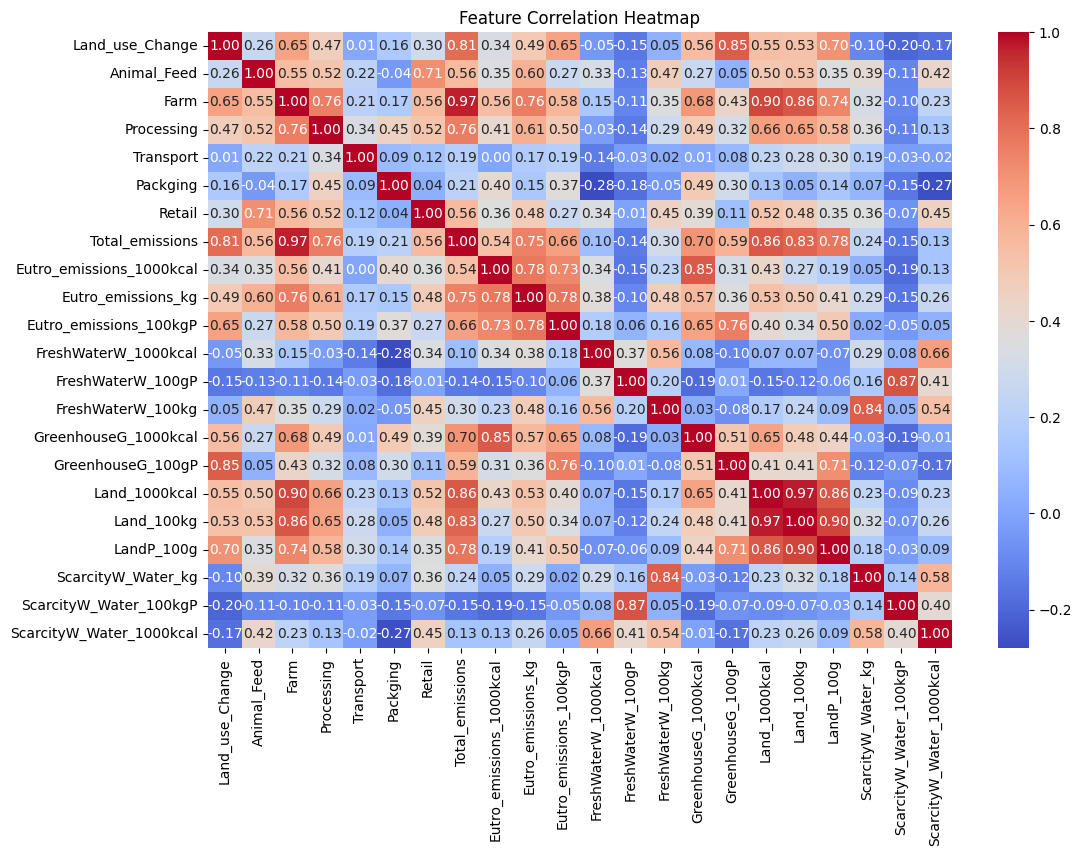

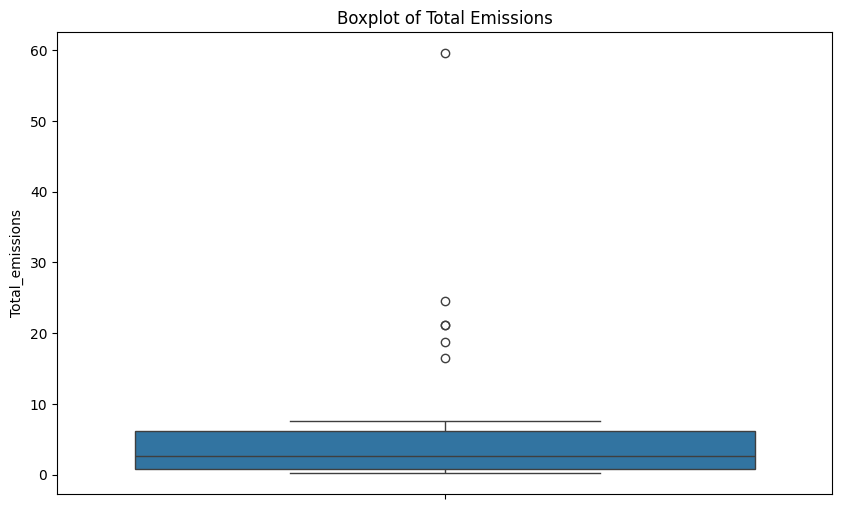

In [39]:
# Ensure numeric columns only for correlation
numeric_df = df_Food_Production.select_dtypes(include=['number'])

# Bar plot of total emissions per food category
plt.figure(figsize=(12, 6))
sns.barplot(data=df_Food_Production, x="Food_Category", y="Total_emissions", ci=None)
plt.xticks(rotation=90)
plt.title("Total Emissions by Food Category")
plt.show()

# Correlation heatmap (Fixed)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to check outliers in emissions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_Food_Production, y="Total_emissions")
plt.title("Boxplot of Total Emissions")
plt.show()




## 📊 **Visual Explanation and Outcomes**

### 1. **Bar Plot: Total Emissions by Food Category (Bivariate)**
**What it shows:**
- Clear difference in emissions between **Animal-Based** and **Plant-Based** foods.
- **Animal-Based** foods emit significantly more (≈16.8 kgCO₂eq) than Plant-Based foods (≈3.2 kgCO₂eq).

**Insight:**
- Shifting to plant-based diets could greatly reduce food-related carbon emissions.

---

### 2. **Correlation Heatmap (Multivariate)**

**What it shows:**
- A matrix of correlation values between numerical features like:
  - `Total_emissions`, `Land use`, `Farm`, `Transport`, `Water use`, etc.
- Strong correlations help identify **redundant variables** or **key drivers** of emissions.

**Example Insight:**
- If `Farm` and `Total_emissions` are highly correlated (e.g., 0.9), it tells us **farm-related processes** are the biggest contributors to emissions.

---

### 3. **Boxplot of Total Emissions (Univariate)**

**What it shows:**
- The distribution, median, and outliers in `Total_emissions`.
- Likely shows **right-skewness** with **beef/lamb as outliers**.

**Insight:**
- Most food items have low emissions, but a few (mostly meats) drastically inflate the average.
- These outliers could **bias statistical results** like the mean, so consider also using the **median**.

---

## ✅ Summary Table

| Visualization | Type | Main Insight |
|---------------|------|--------------|
| Bar Plot | Bivariate | Animal-based foods emit ~5x more CO₂eq than plant-based. |
| Heatmap | Multivariate | Farm and land use strongly influence emissions. |
| Boxplot | Univariate | Emissions are skewed with extreme outliers like beef and lamb. |

---



### Hypothesis Testing


- Null Hypothesis (H₀):
Animal-based food production does not have a significantly higher environmental footprint than plant-based food production.
(There is no significant difference or plant-based may have equal or greater impact.)

- Alternative Hypothesis (H₁):
Animal-based food production has a significantly higher environmental footprint than plant-based food production.



Steps to Test Hypothesis
Group the data by Food_Category (Animal-Based vs. Plant-Based).

Calculate the mean of Total_emissions for each category.

Use a statistical test (t-test) to check if the difference is significant.

Visualize the results using a boxplot.



Food_Category
Animal-Based    16.900000
Plant-Based      3.195833
Name: Total_emissions, dtype: float64
T-statistic: 2.242
P-value: 0.054
Result: No significant difference found.


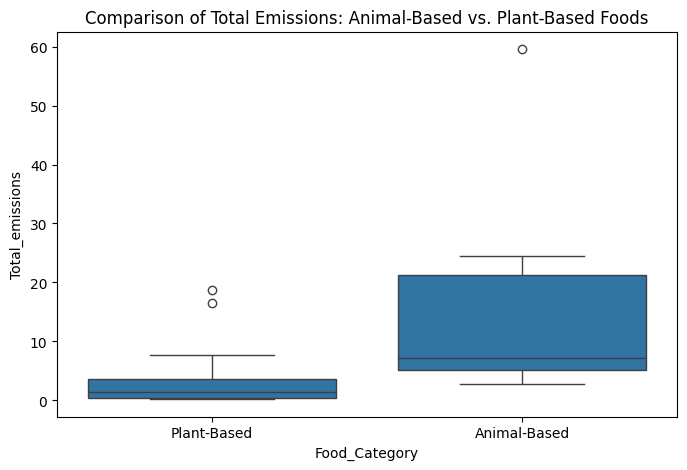

In [40]:
# Group by Food Category and calculate mean Total_emissions
emission_means = df_Food_Production.groupby("Food_Category")["Total_emissions"].mean()
print(emission_means)

# Perform an independent t-test
animal_emissions = df_Food_Production[df_Food_Production["Food_Category"] == "Animal-Based"]["Total_emissions"]
plant_emissions = df_Food_Production[df_Food_Production["Food_Category"] == "Plant-Based"]["Total_emissions"]

t_stat, p_value = stats.ttest_ind(animal_emissions, plant_emissions, equal_var=False)  # Welch's t-test

# Print the test results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Result: Significant difference. Animal-based foods have a significantly higher environmental impact.")
else:
    print("Result: No significant difference found.")

# Boxplot for visual comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_Food_Production, x="Food_Category", y="Total_emissions")
plt.title("Comparison of Total Emissions: Animal-Based vs. Plant-Based Foods")
plt.show()


Here’s a clear and concise summary of my observations:

**Summary of Emissions Analysis: Animal-Based vs Plant-Based Foods**

1. **Statistical Findings**
- **Mean Emissions**:  
  - **Animal-Based**: 16.90 kgCO₂eq  
  - **Plant-Based**: 3.20 kgCO₂eq  
- **T-statistic**: 2.242 | **P-value**: 0.054  

- **Conclusion**:  
  The difference is not statistically significant at the 95% confidence level—but it's **very close**, suggesting a strong practical difference.



2. **Boxplot Insights**
- **Higher Medians**: Animal-based foods clearly emit more CO₂ on average.
- **Wider Spread**: Animal products show more variability and extreme outliers (e.g., beef).
- **Skewed Distribution**:  
  - Animal-based = Right-skewed (few items inflate the mean)  
  - Plant-based = More compact and symmetrical
- **Overlap in IQRs**: Some overlap exists, explaining the borderline p-value.



🔍 **Key Takeaways**
- There’s a substantial mean difference, even if not statistically significant at the 5% level.
- A larger sample or better data could yield a more conclusive result.
- Outliers in animal-based foods (like beef and lamb) significantly impact the average—so it’s important to also consider medians and distribution shapes.

 



## Research Questions and Analysis

1. Which food products has the highest and lowest carbon emissions?

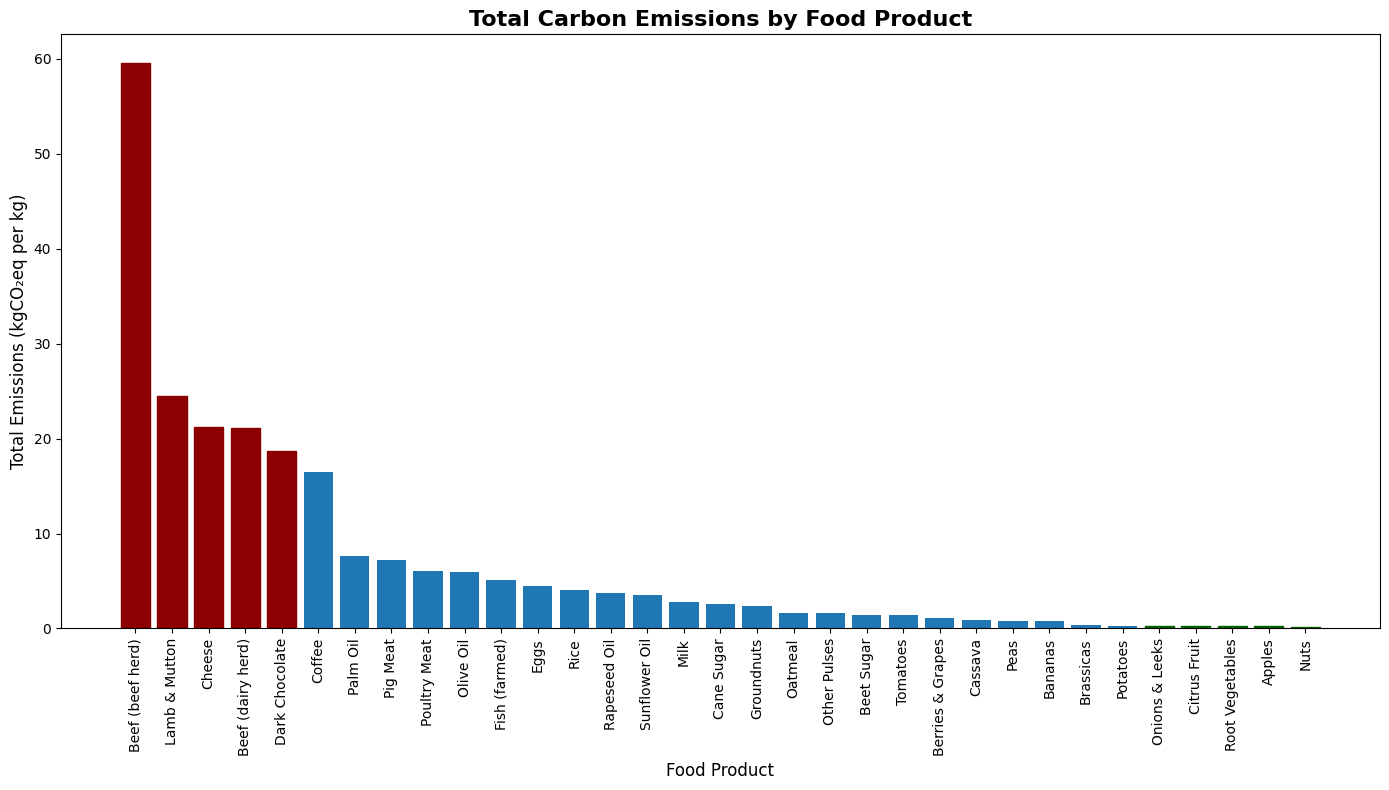

In [41]:
# Sort by Total_emissions in descending order and drop NaN values in 'Total_emissions' column
sorted_data = df_Food_Production.sort_values('Total_emissions', ascending=False).dropna(subset=['Total_emissions'])

# Create figure for the bar chart
plt.figure(figsize=(14, 8))

# Create a bar plot of Total emissions by Food Product
bars = plt.bar(sorted_data['Food_product'], sorted_data['Total_emissions'])

# Highlight the top 5 and bottom 5 food products
for i in range(5):
    bars[i].set_color('darkred')   # Top 5 highest emissions
    bars[-(i+1)].set_color('darkgreen')  # Bottom 5 lowest emissions

# Add labels and title
plt.xlabel('Food Product', fontsize=12)
plt.ylabel('Total Emissions (kgCO₂eq per kg)', fontsize=12)
plt.title('Total Carbon Emissions by Food Product', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()


#### Insights:
This is essential data when evaluating how our dietary choices impact the environment.

- **Highest Emitters**: 
Beef (beef herd) is the top contributor, emitting around **60 kgCO₂eq/kg**—more than double the next highest.Other high emitters include Lamb & Mutton, Cheese, Dairy Beef, and Dark Chocolate.

- **Mid-Range Emitters**:  
Foods like Coffee, Palm Oil, Pig & Poultry Meat, Eggs, and Rice produce moderate emissions (5–17 kgCO₂eq/kg), often due to processing, methane release, or land use.

- **Lowest Emitters**:  
Plant-based foods like Nuts, Apples, Root Vegetables, Citrus Fruits, and Onions produce less than 1 kgCO₂eq/kg**. These are the most environmentally friendly options.

  
Animal-based products, especially red meat and dairy, have the highest carbon footprints. Plant-based diets are significantly more sustainable, offering a powerful way to reduce environmental impact. Plant-based diets not only promote health but also drastically reduce environmental impact.



2. Which stage of food production contributes the most to carbon emissions? To determine which stage of food production contributes the most to carbon emissions, we can look at the emissions from each production stage and compare them

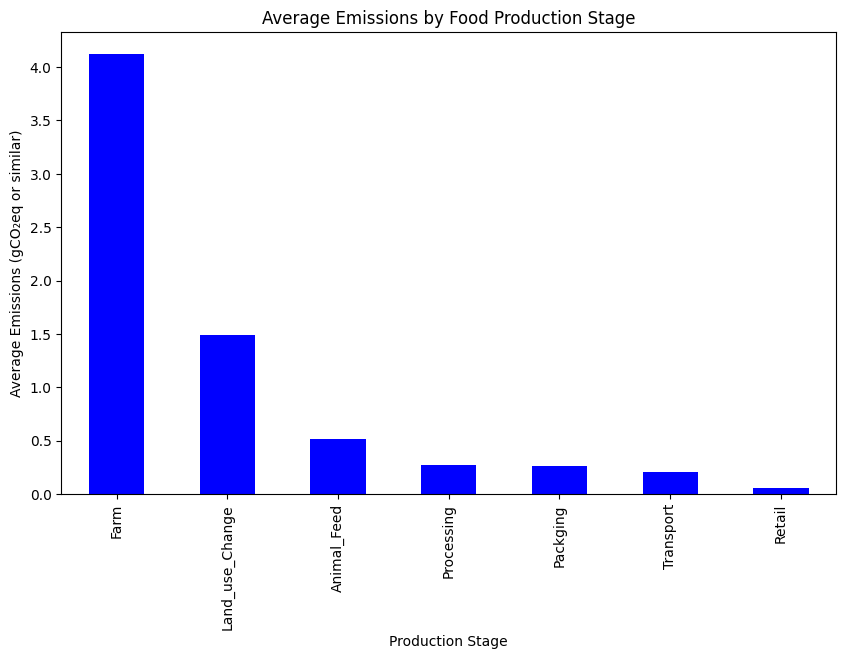

The production stage contributing the most to carbon emissions is: Farm with 4.12 emissions.


In [42]:
# Select the production stage columns
stages = ['Land_use_Change', 'Animal_Feed', 'Farm', 'Processing', 
          'Transport', 'Packging', 'Retail']

# Calculate the mean emissions for each stage across all food categories
stage_emissions = df_Food_Production[stages].mean()

# Sort the emissions by magnitude to identify the stage with the highest contribution
stage_emissions_sorted = stage_emissions.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
stage_emissions_sorted.plot(kind='bar', color='blue')
plt.title("Average Emissions by Food Production Stage")
plt.ylabel("Average Emissions (gCO₂eq or similar)")
plt.xlabel("Production Stage")
plt.show()

# Print the stage with the highest emissions
print(f"The production stage contributing the most to carbon emissions is: {stage_emissions_sorted.idxmax()} with {stage_emissions_sorted.max():.2f} emissions.")


3. How do carbon emissions (Greenhouse Gases) differ between animal-based and plant-based foods across all stages of production?

This will help you analyze the environmental burden associated with greenhouse gas emissions across different food categories.

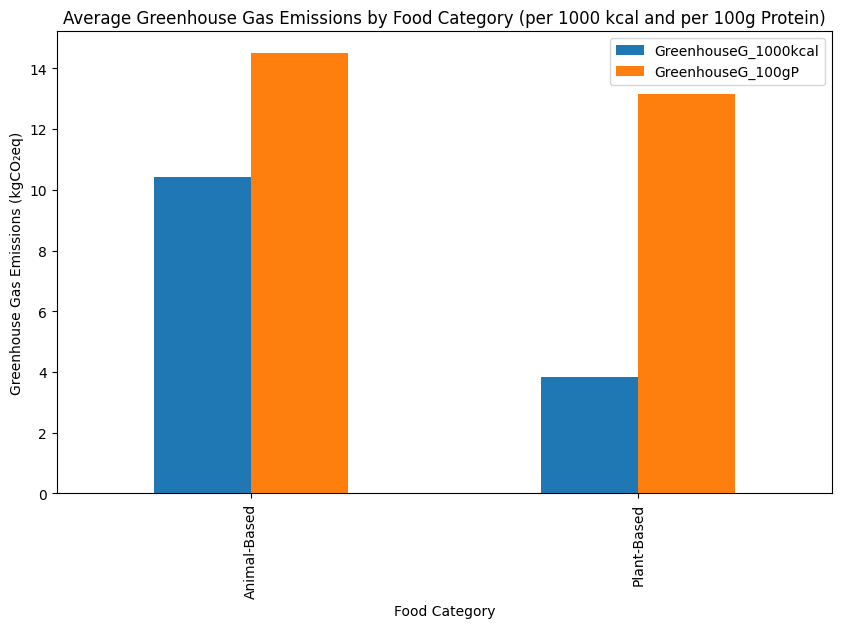

In [43]:
# Analyzing Greenhouse Gas emissions at various stages for each food category
greenhouse_emissions = df_Food_Production.groupby("Food_Category")[['GreenhouseG_1000kcal', 'GreenhouseG_100gP']].mean()

# Plotting Greenhouse Gas emissions by Food Category
greenhouse_emissions.plot(kind='bar', figsize=(10, 6))
plt.title("Average Greenhouse Gas Emissions by Food Category (per 1000 kcal and per 100g Protein)")
plt.ylabel("Greenhouse Gas Emissions (kgCO₂eq)")
plt.xlabel("Food Category")
plt.show()



Observations: 

4. What is the relationship between land use (per kcal and per kg) and food category? This question will help investigate how much land is required for producing different food categories, focusing on both land use efficiency (per kcal) and overall land consumption (per kg).

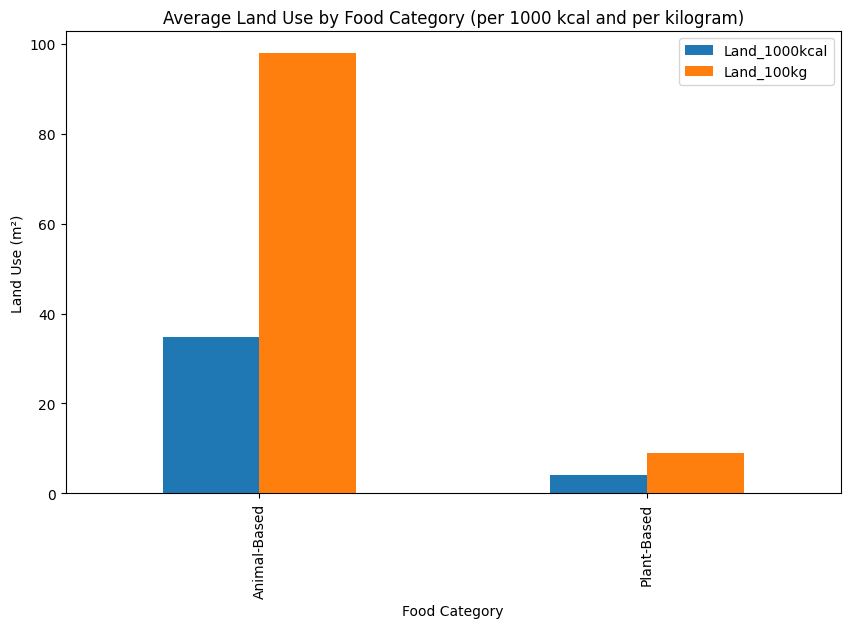

In [44]:
# Analyzing Land Use for each food category
land_use = df_Food_Production.groupby("Food_Category")[['Land_1000kcal', 'Land_100kg']].mean()

# Plotting Land Use by Food Category
land_use.plot(kind='bar', figsize=(10, 6))
plt.title("Average Land Use by Food Category (per 1000 kcal and per kilogram)")
plt.ylabel("Land Use (m²)")
plt.xlabel("Food Category")
plt.show()


5. How do water withdrawals (freshwater and scarcity-weighted) vary between food categories?
Investigating the impact of different food categories on freshwater resources and scarcity-weighted water use will highlight sustainability concerns related to water use.

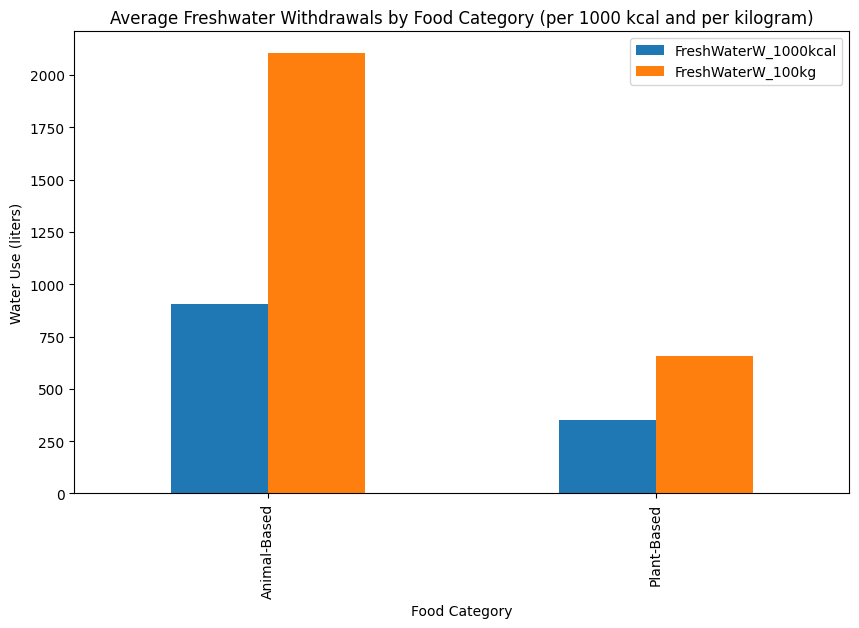

In [45]:
# Analyzing Freshwater withdrawals for each food category
freshwater_withdrawals = df_Food_Production.groupby("Food_Category")[['FreshWaterW_1000kcal', 'FreshWaterW_100kg']].mean()

# Plotting Freshwater Withdrawals by Food Category
freshwater_withdrawals.plot(kind='bar', figsize=(10, 6))
plt.title("Average Freshwater Withdrawals by Food Category (per 1000 kcal and per kilogram)")
plt.ylabel("Water Use (liters)")
plt.xlabel("Food Category")
plt.show()


6. How does processing impact the total emissions for animal-based foods compared to plant-based foods?
This question will explore the contribution of the processing stage to the overall emissions for both categories.

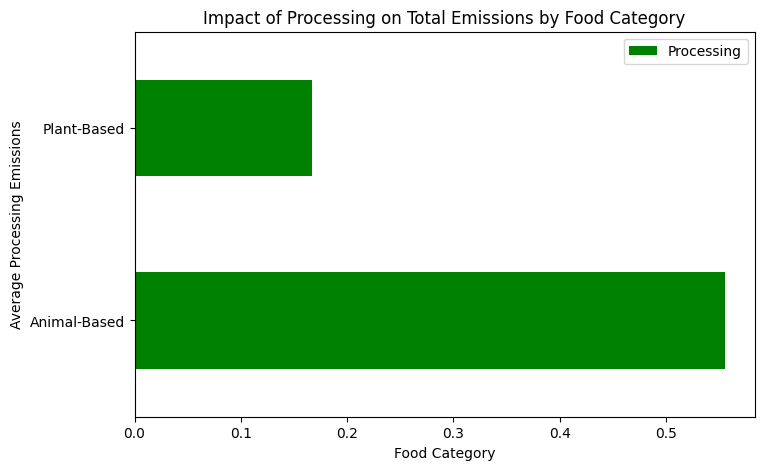

In [46]:
# Calculating the impact of Processing on total emissions by food category
processing_emissions = df_Food_Production.groupby("Food_Category")[['Processing']].mean()

# Plotting the impact of Processing on Total Emissions by Food Category
processing_emissions.plot(kind='barh', figsize=(8, 5), color=['green', 'red'])
plt.title("Impact of Processing on Total Emissions by Food Category")
plt.ylabel("Average Processing Emissions")
plt.xlabel("Food Category")
plt.show()


7. What is the environmental trade-off between animal feed and overall emissions in animal-based foods?
Here, you can analyze how the emissions from animal feed contribute to the overall environmental footprint of animal-based foods.



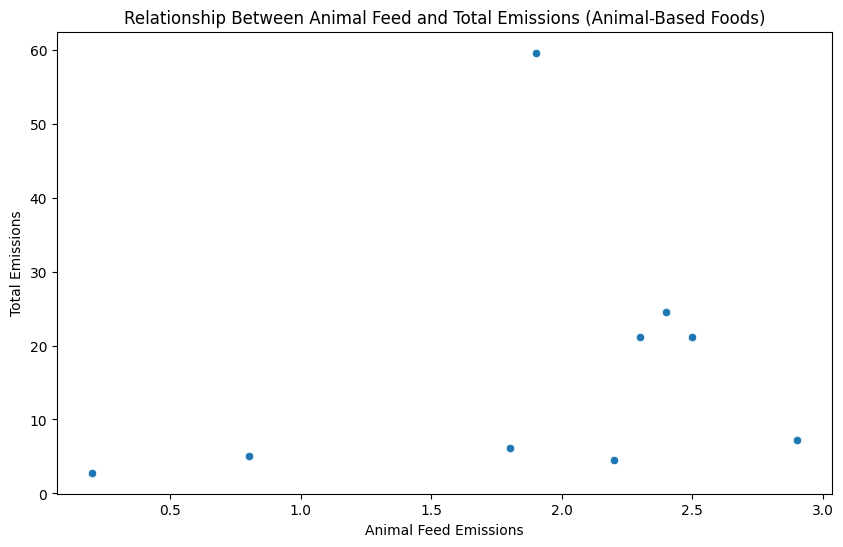

In [47]:
# Analyzing the relationship between Animal Feed and Total Emissions
feed_vs_emissions = df_Food_Production[df_Food_Production['Food_Category'] == 'Animal-Based'][['Animal_Feed', 'Total_emissions']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feed_vs_emissions['Animal_Feed'], y=feed_vs_emissions['Total_emissions'])
plt.title("Relationship Between Animal Feed and Total Emissions (Animal-Based Foods)")
plt.xlabel("Animal Feed Emissions")
plt.ylabel("Total Emissions")
plt.show()


8. Which food category has the highest eutrophying emissions per protein (gPO₄eq), and how does it relate to its overall emissions?
Eutrophication can be a key concern for water bodies. This analysis will examine the eutrophying emissions per protein for each food category and their relationship with total emissions.

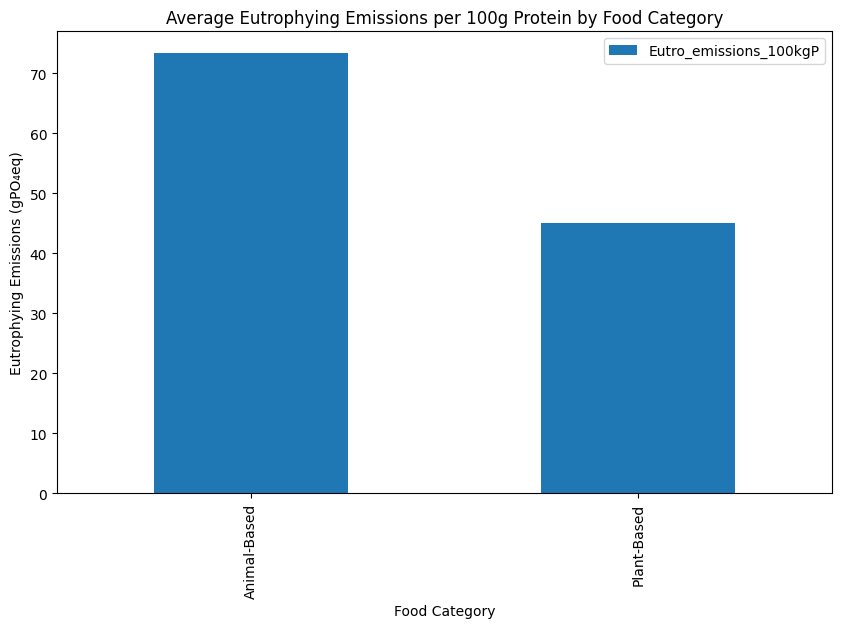

In [48]:
# Comparing eutrophying emissions per 100g protein between food categories
eutrophying_emissions = df_Food_Production.groupby("Food_Category")[['Eutro_emissions_100kgP']].mean()

# Plotting eutrophying emissions by food category
eutrophying_emissions.plot(kind='bar', figsize=(10, 6))
plt.title("Average Eutrophying Emissions per 100g Protein by Food Category")
plt.ylabel("Eutrophying Emissions (gPO₄eq)")
plt.xlabel("Food Category")
plt.show()


9. How do packaging emissions vary between animal-based and plant-based foods, and what impact does this have on overall sustainability?
This question will evaluate the role of packaging in the overall emissions for both food categories, offering insights into potential areas for improvement in sustainability.

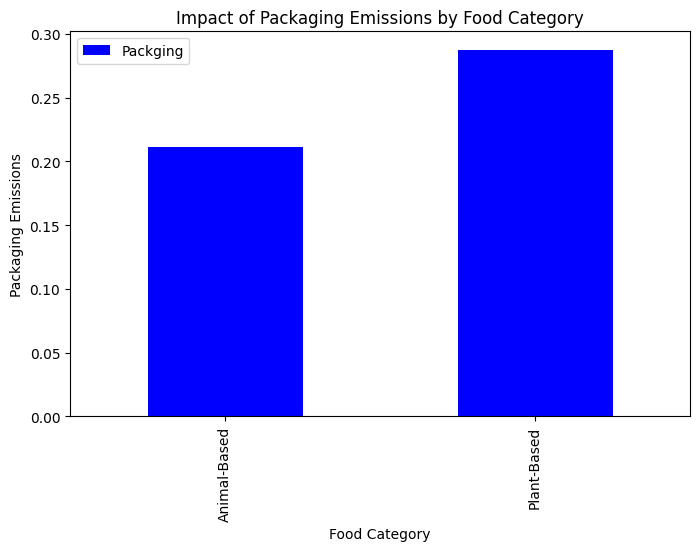

In [49]:
# Analyzing Packaging emissions for each food category
packaging_emissions = df_Food_Production.groupby("Food_Category")[['Packging']].mean()

# Plotting Packaging Emissions by Food Category
packaging_emissions.plot(kind='bar', figsize=(8, 5), color=['blue', 'orange'])
plt.title("Impact of Packaging Emissions by Food Category")
plt.ylabel("Packaging Emissions")
plt.xlabel("Food Category")
plt.show()


Observations:

### Recommendations



1. **Policy Support for Sustainable Diets**
   - Incentivize **plant-based protein** alternatives like **legumes, tofu, nuts**.
   - Use these insights for **environmental labeling** and **consumer education** initiatives promoting low-emission diets.
   - Taxation or disincentives for **high-emission meat** products.

2. **Farm-Level Interventions**
   - Promote low-emission livestock feed and improved grazing systems.
   - Invest in **methane reduction** practices (e.g., feed additives).

3. **Consumer Awareness**
   - Label foods with **carbon and water footprint**.
   - Public campaigns on environmental impact of dietary choices.

4. **Sustainable Processing**
   - Reduce processing emissions in packaging, transport, retail.

   

5. **Sustainability Strategy**:
   - Despite the statistical result, the visual and practical evidence suggests that animal-based products are less sustainable due to their emission intensity.
   - Encourage a reduction in animal-based food consumption as a climate action measure.
   - If you're looking to eat in a more environmentally responsible way, shifting toward plant-based, locally grown, and minimally processed foods is the most impactful step. While individual dietary changes may seem small, collectively, they contribute greatly to climate goals.



---

## **Sample Research Papers **

1. **Poore & Nemecek (2018)** – *Reducing food’s environmental impacts through producers and consumers*  
   https://science.sciencemag.org/content/360/6392/987  
   - One of the most comprehensive studies comparing food products' environmental impacts.

2. **Springmann et al. (2018)** – *Options for keeping the food system within environmental limits*  
   https://www.nature.com/articles/s41586-018-0594-0  
   - Explores dietary shifts, food waste reduction, and sustainable farming practices.

3. **FAO (2021)** – *Global Livestock Environmental Assessment Model (GLEAM)*  
   - Detailed emissions modeling for livestock production.


- **Poore & Nemecek (2018)**: _"Reducing food’s environmental impacts through producers and consumers"_ – *Science*  
  📌 [Link to study](https://www.science.org/doi/10.1126/science.aaq0216)

This paper highlights that **animal-based foods typically have higher environmental footprints**, supporting your my findings.






